In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel

import mne

In [8]:
processed_fif_file = 'subj04_session2.fif'
epochs = mne.read_epochs(processed_fif_file)

Reading c:\Users\marty\OneDrive\Documents\Code\subj04_session2.fif ...
    Found the data of interest:
        t =     -50.78 ...     650.39 ms
        0 CTF compensation matrices available


C:\Users\marty\AppData\Local\Temp\ipykernel_9860\611992274.py:2: RuntimeWarning: This filename (subj04_session2.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(processed_fif_file)


Not setting metadata
3840 matching events found
No baseline correction applied
0 projection items activated


In [10]:
print(epochs)

<EpochsFIF |  3840 events (all good), -0.0507812 – 0.650391 s, baseline -0.05 – 0 s, ~685.6 MB, data loaded,
 '1': 4
 '2': 4
 '3': 4
 '4': 4
 '5': 4
 '6': 4
 '7': 4
 '8': 4
 '9': 4
 '10': 4
 and 950 more events ...>


In [11]:
print(epochs.info)  # Information about the epochs

<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 1 Stimulus
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2024-01-17 15:26:03 UTC
 meas_id: 4 items (dict)
 nchan: 65
 projs: []
 sfreq: 512.0 Hz
>


In [12]:
print(epochs.get_data().shape)  # Shape of the EEG data array

(3840, 65, 360)


C:\Users\marty\AppData\Local\Temp\ipykernel_9860\896243110.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(epochs.get_data().shape)  # Shape of the EEG data array


In [13]:
print(epochs.info['ch_names'])  # Names of all channels
print(epochs.info['chs'][0])  # Information about the first channel

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'Status']
{'scanno': 1, 'logno': 1, 'kind': 2 (FIFFV_EEG_CH), 'range': 1.0, 'cal': 1.0, 'coil_type': 1 (FIFFV_COIL_EEG), 'loc': array([-0.0309026 ,  0.11458518,  0.02786657,  0.        ,  0.        ,
        0.        ,         nan,         nan,         nan,         nan,
               nan,         nan]), 'unit': 107 (FIFF_UNIT_V), 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'Fp1', 'coord_frame': 4 (FIFFV_COORD_HEAD)}


In [15]:
print(epochs.event_id)  # Dictionary mapping event names to event codes

{'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 81, '82': 82, '83': 83, '84': 84, '85': 85, '86': 86, '87': 87, '88': 88, '89': 89, '90': 90, '91': 91, '92': 92, '93': 93, '94': 94, '95': 95, '96': 96, '97': 97, '98': 98, '99': 99, '100': 100, '101': 101, '10

Using matplotlib as 2D backend.


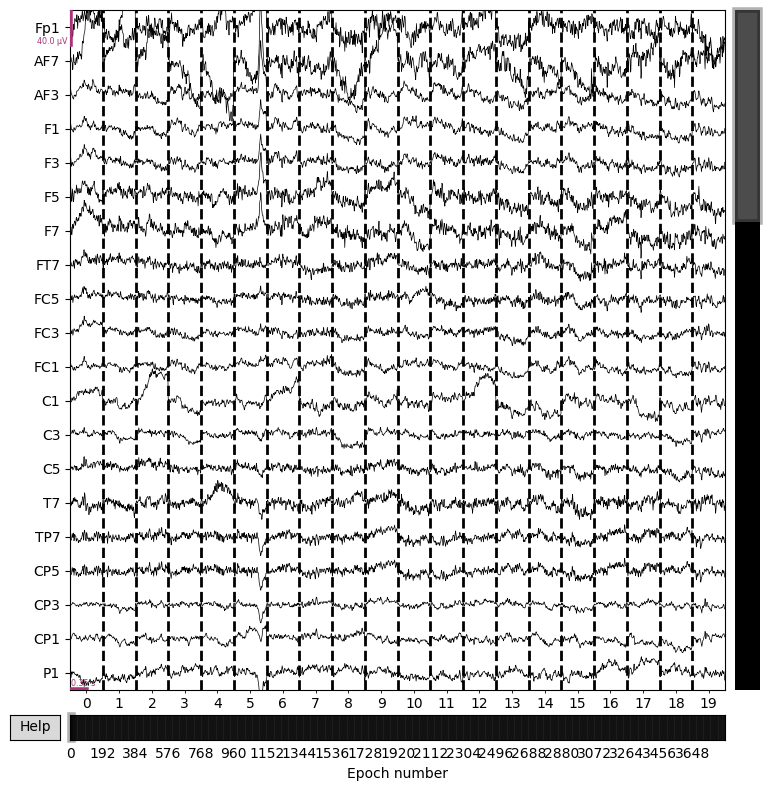

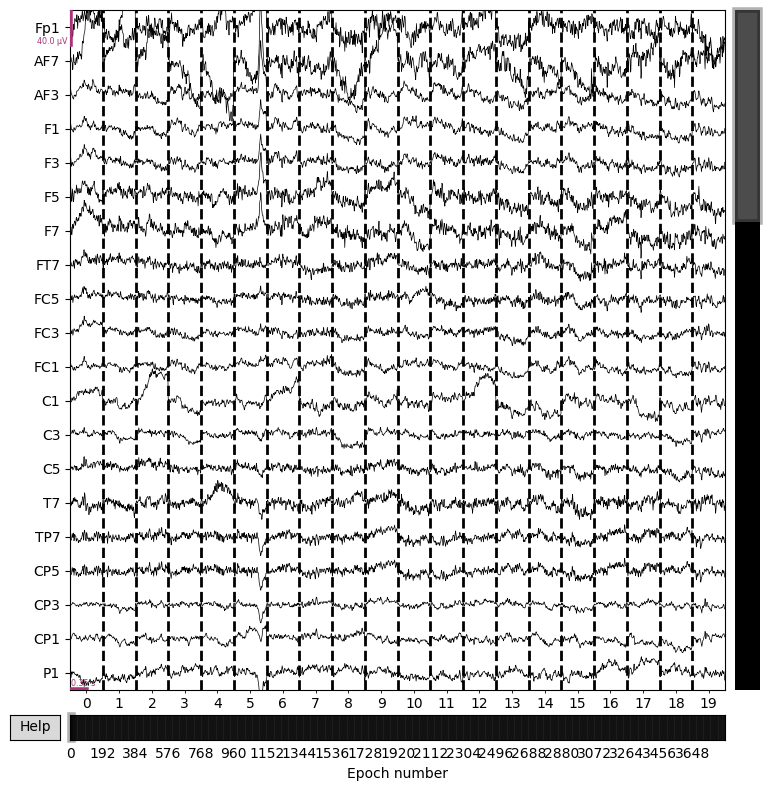

In [16]:
epochs.plot()  # Plot the epochs

In [21]:
# Adjust time bounds and frequency range
tmin = 0.0  # Start from the beginning of each trial
tmax = 20.0  # Extend the time window to capture the steady-state response
fmin = 1.0  # Minimum frequency of interest
fmax = 30.0  # Maximum frequency of interest

# Compute PSD using Welch's method
spectrum = epochs.compute_psd(
    method='welch',
    n_fft=None,  # Let MNE automatically determine n_fft based on n_per_seg
    n_overlap=0,  # No overlap between segments
    n_per_seg=int(512.0 * (tmax - tmin)),  # Number of samples per segment
    tmin=tmin,
    tmax=tmax,
    fmin=fmin,
    fmax=fmax,
    window='boxcar',  # No windowing function (boxcar)
    verbose=False
)


In [29]:
spectrum

Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Epochs
Number of epochs,3840
Dims,"epoch, channel, freq"
Estimation method,welch
Number of channels,64
Number of frequency bins,19
Frequency range,1.53 – 29.13 Hz


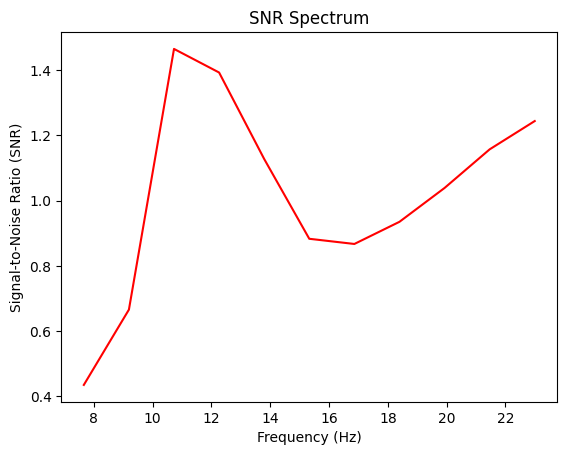

In [33]:
# Retrieve PSD values and corresponding frequencies
psds, freqs = spectrum.get_data(return_freqs=True)

def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate(
        (
            np.ones(noise_n_neighbor_freqs),
            np.zeros(2 * noise_skip_neighbor_freqs + 1),
            np.ones(noise_n_neighbor_freqs),
        )
    )
    averaging_kernel /= averaging_kernel.sum()

    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode="valid"), axis=-1, arr=psd
    )

    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(mean_noise, pad_width=pad_width, constant_values=np.nan)

    return psd / mean_noise

# Compute SNR spectrum
snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3, noise_skip_neighbor_freqs=1)

# Plot the SNR spectrum
plt.figure()
plt.plot(freqs, snrs.mean(axis=(0, 1)), color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('SNR Spectrum')
plt.show()


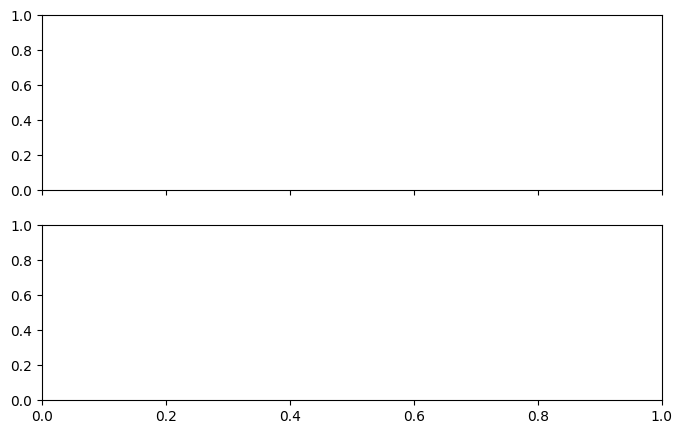

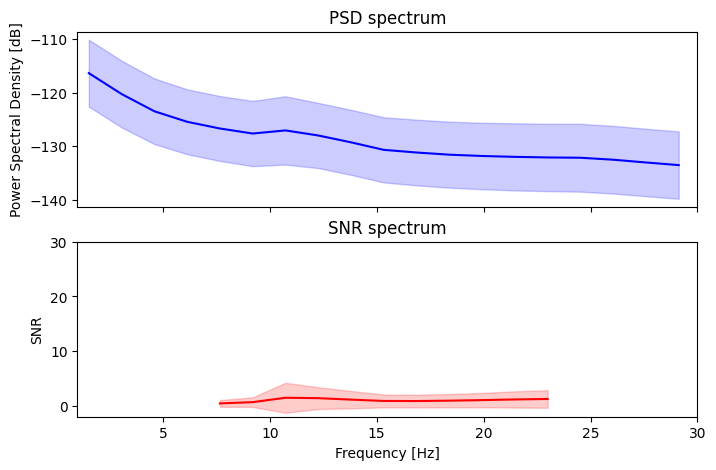

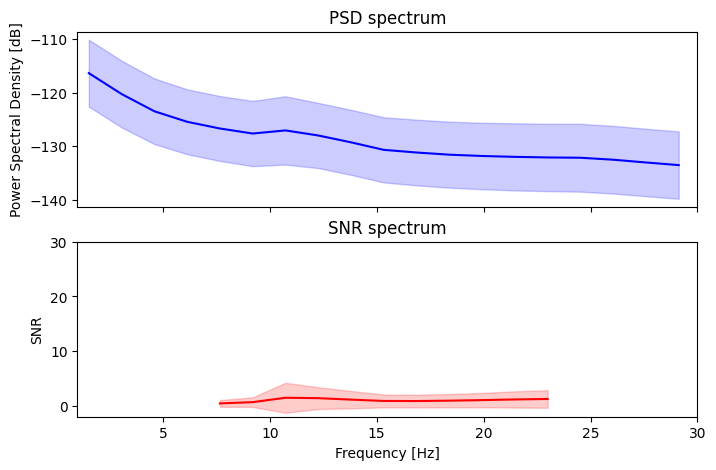

In [39]:
fig, axes = plt.subplots(2, 1, sharex="all", sharey="none", figsize=(8, 5))
# freq_range = range(
#     np.where(np.floor(freqs) == 1.0)[0][0], np.where(np.ceil(freqs) == fmax - 1)[0][0])
freq_range = range(
    np.where(np.floor(freqs) == fmin)[0][0],
    np.where(np.ceil(freqs) == fmax)[0][0] + 1
)


psds_plot = 10 * np.log10(psds)
psds_mean = psds_plot.mean(axis=(0, 1))[freq_range]
psds_std = psds_plot.std(axis=(0, 1))[freq_range]
axes[0].plot(freqs[freq_range], psds_mean, color="b")
axes[0].fill_between(
    freqs[freq_range], psds_mean - psds_std, psds_mean + psds_std, color="b", alpha=0.2
)
axes[0].set(title="PSD spectrum", ylabel="Power Spectral Density [dB]")

# SNR spectrum
snr_mean = snrs.mean(axis=(0, 1))[freq_range]
snr_std = snrs.std(axis=(0, 1))[freq_range]

axes[1].plot(freqs[freq_range], snr_mean, color="r")
axes[1].fill_between(
    freqs[freq_range], snr_mean - snr_std, snr_mean + snr_std, color="r", alpha=0.2
)
axes[1].set(
    title="SNR spectrum",
    xlabel="Frequency [Hz]",
    ylabel="SNR",
    ylim=[-2, 30],
    xlim=[fmin, fmax],
)
plt.show()